# 🚜 Predicting the Auction Price of Bulldozers using Machine Learning
The goal of this contest was to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition
Can we predict the price that a bulldover will sell for at an auction given certain characteristics? 

## 2. Data
Data and more information on the contest:
https://www.kaggle.com/c/bluebook-for-bulldozers

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set * * throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. The goal will be to minimise the error.

## 4. Features
Kaggle has provided a full data dictionary:
https://www.kaggle.com/c/bluebook-for-bulldozers/data

### Getting ready

In [1]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error

### Loading the data

In [2]:
df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

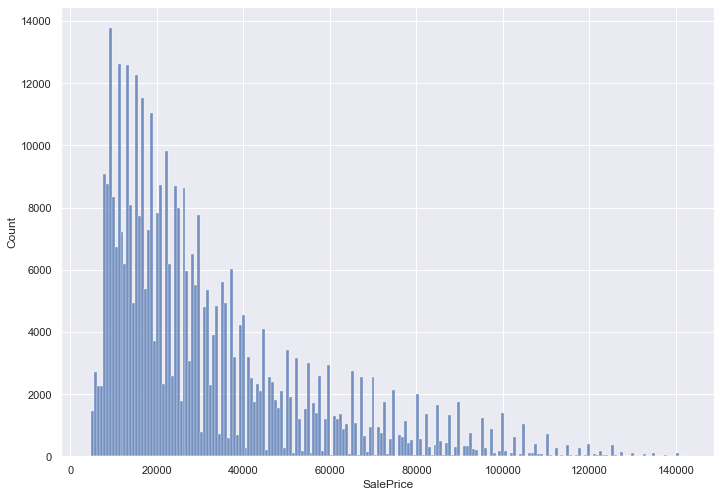

In [5]:
sns.histplot(df['SalePrice']);

### Date features

In [6]:
df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False,
                parse_dates=['saledate'])

In [7]:
df.sort_values(by=['saledate'], inplace=True)
df_tmp = df.copy()

In [8]:
df_tmp['year'] = df['saledate'].dt.year
df_tmp['month'] = df['saledate'].dt.month
df_tmp['day'] = df['saledate'].dt.day
df_tmp['dayofweek'] = df['saledate'].dt.dayofweek
df_tmp['dayofyear'] = df['saledate'].dt.dayofyear
#df['year-month'] = df['saledate'].dt.strftime('%Y-%m')

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

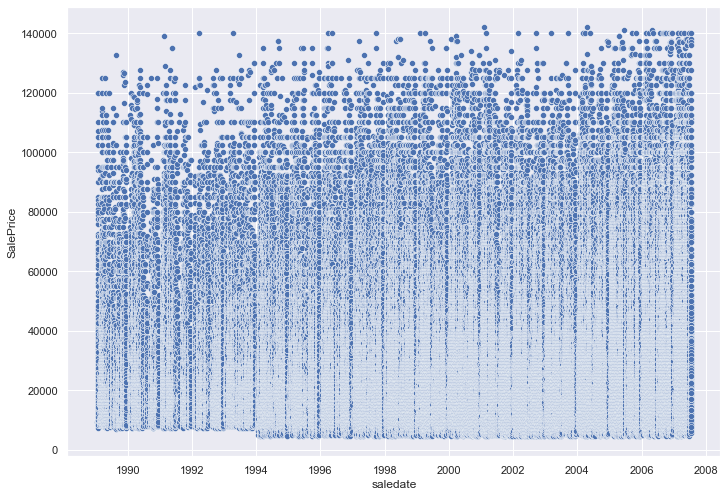

In [9]:
sns.scatterplot(data=df.loc[:1000,:], x='saledate', y='SalePrice')

In [12]:
#sns.lineplot(data=df.groupby(['year-month']).mean().reset_index(), x='year-month', y='SalePrice')
#plt.title('Average Monthly Sale Price from 1990 - 2009');

In [13]:
# sns.countplot(x=df['year'])
# plt.title('Monthly Sale Volume');

<AxesSubplot:>

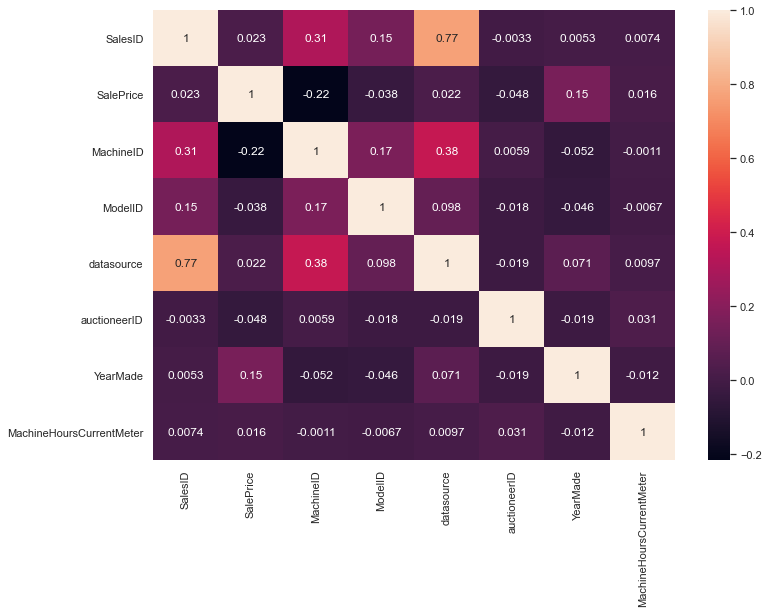

In [14]:
sns.heatmap(df.corr(), annot=True)

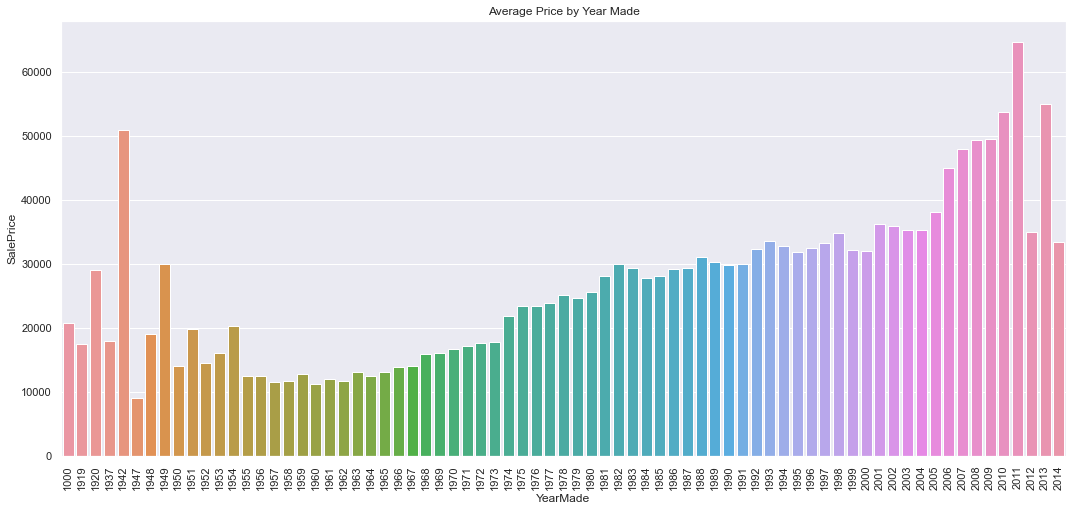

In [15]:
plt.figure(figsize=(18,8))
sns.barplot(data=df.groupby(['YearMade']).mean().reset_index(), x='YearMade', y='SalePrice')
plt.xticks(rotation=90)
plt.title('Average Price by Year Made');

In [16]:
df_tmp.drop('saledate', axis=1, inplace=True)

## 5. Modelling

In [17]:
rf = RandomForestRegressor(n_jobs=-1,
                          random_state=42) # cores on computer

In [18]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [19]:
# Turn all of the string values into category values

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [20]:
df_tmp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [21]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [22]:
# We now have a way to access all of our data in the form of numbers
# but we still have lots of missing data

In [23]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [24]:
df_tmp.to_csv('train_tmp.csv',index=False)

In [25]:
df_tmp = pd.read_csv('train_tmp.csv')

C:\Users\Michael.SmithChandle\Desktop\ML\bulldozer-price-prediction-project\env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Fill missing values

In [26]:
# numeric

In [27]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
year
month
day
dayofweek
dayofyear


In [28]:
# Check which have null values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [29]:
# Fill numeric rows with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():        
            # Add a binary column which tells us if the data was missing
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # Fill missing values with median
            df_tmp[label] = content.fillna(content.median)

In [30]:
# median more robust than mean if there are outliers

In [31]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():        
            print(label)

In [32]:
# Filling missing categorical values

In [33]:
pd.Categorical(df_tmp['Blade_Width']).codes

array([-1, -1, -1, ..., -1,  2, -1], dtype=int8)

In [34]:
# If there is a missing value, pandas assigns it a value of - 1

In [35]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # Turn numbers into categories and add + 1
        df_tmp[label] = pd.Categorical(content).codes + 1


In [36]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(1), int16(5), int64(10), int8(41)
memory usage: 72.8 MB


In [37]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [38]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Modelling
Now that all our data is numeric with no missing values
we should be able to build a model

In [39]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,1,1974,1,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,2,1980,1,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,2,1978,1,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,2,1980,1,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,2,1984,1,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [40]:
len(df_tmp)

412698

In [41]:
X = df_tmp.drop('SalePrice', axis=1)
y = df_tmp['SalePrice']

In [121]:
%%time
# Instantiate 
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X, y)

Wall time: 3min 1s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [122]:
# Score model
model.score(X, y)

0.9877393441322722

In [123]:
# Above metric not reliable as it is being tested on the 
# same data as it was trained with

### Splitting into training and validation sets

In [42]:
df_tmp.year

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: year, Length: 412698, dtype: int64

In [43]:
df_val = df_tmp[df_tmp.year == 2012]
df_train = df_tmp[df_tmp.year != 2012]
len(df_val), len(df_train)

(11573, 401125)

In [44]:
X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train.SalePrice
X_valid = df_val.drop('SalePrice', axis=1)
y_valid = df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [45]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [132]:
model.score(X_valid, y_valid)

0.8703882168172201

In [46]:
def rmsle(y_test, y_pred):
    """
    Calculate root mean squared log error of test predications
    against true values
    """
    
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_valid, val_preds),
             'Training RMSLE': rmsle(y_train, train_preds),
             'Valid RMSLE': rmsle(y_valid, val_preds),
             'Training R2': r2_score(y_train, train_preds),
             'Valid R2': r2_score(y_valid, val_preds)}
    return scores

### Testing our model on a subset (to tune the hyperparams)

In [47]:
# model = RandomForestRegressor(n_jobs=-1,
#                              random_state=42)
# model.f

In [48]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [49]:
%%time 
# Cutting down on max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

Wall time: 5.55 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [50]:
X_train.shape[0]

401125

In [51]:
show_scores(model)

{'Training MAE': 5569.966734384545,
 'Valid MAE': 7177.30513522855,
 'Training RMSLE': 0.25815692814889707,
 'Valid RMSLE': 0.2932676701203707,
 'Training R2': 0.8604244776147991,
 'Valid R2': 0.8317275337770736}

### Hyperparam tuning with RandomisedSearchCV

In [145]:
%%time
rf_grid = {'n_estimators': np.arange(10,100,10),
          'max_depth': [None, 3,5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2),
          'max_features': [0.5, 1, 'sqrt', 'auto'],
          'max_samples': [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                                param_distributions=rf_grid,
                                n_iter=5,
                                cv=5,
                                verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 1min 43s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [146]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [147]:
show_scores(rs_model)

{'Training MAE': 5666.574107044301,
 'Valid MAE': 7332.691631621976,
 'Training RMSLE': 0.26187662702914416,
 'Valid RMSLE': 0.29614228524513253,
 'Training R2': 0.8529076370132542,
 'Valid R2': 0.8196262655061702}

In [63]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)
ideal_model.fit(X_train, y_train)

Wall time: 30.4 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [64]:
show_scores(ideal_model)

{'Training MAE': 2968.4373424129312,
 'Valid MAE': 6033.683486362386,
 'Training RMSLE': 0.14500253799740906,
 'Valid RMSLE': 0.24862303214648593,
 'Training R2': 0.9584298501014805,
 'Valid R2': 0.8783627523124771}

### Make predictions on test data

### Get test data on same format as training set

In [77]:
def preprocess_data(df):
    """
    Performs transformations on df.
    """
    df['year'] = df['saledate'].dt.year
    df['month'] = df['saledate'].dt.month
    df['day'] = df['saledate'].dt.day
    df['dayofweek'] = df['saledate'].dt.dayofweek
    df['dayofyear'] = df['saledate'].dt.dayofyear
    df.drop('saledate', axis=1, inplace=True)
    
    # Fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():        
                # Add a binary column which tells us if the data was missing
                df[label+'_is_missing'] = pd.isnull(content)
                # Fill missing values with median
                df[label] = content.fillna(content.median())

    # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            # Turn numbers into categories and add + 1
            df[label] = pd.Categorical(content).codes + 1

    
    return df
    

In [78]:
df_test = pd.read_csv('bluebook-for-bulldozers/Test.csv',
                     low_memory=False,
                     parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [79]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [83]:
# Find column differences

In [84]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [85]:
# manually add missing column

In [86]:
df_test['auctioneerID_is_missing'] = False

In [87]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [88]:
test_preds = ideal_model.predict(df_test)

In [89]:
test_preds

array([21060.37579848, 19562.60478895, 49342.91476615, ...,
       13410.01521317, 16965.71996212, 31983.77420522])

In [90]:
X_valid.shape, df_test.shape

((11573, 102), (12457, 102))

In [91]:
# Format predictions in the same format Kaggle requires

In [92]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,21060.375798
1,1227844,19562.604789
2,1227847,49342.914766
3,1227848,59965.980798
4,1227863,44760.000646
...,...,...
12452,6643171,46089.003311
12453,6643173,22530.264996
12454,6643184,13410.015213
12455,6643186,16965.719962


### Feature Importance

In [94]:
len(ideal_model.feature_importances_)

102

In [136]:
ideal_model.feature_importances_[:5]

array([0.03465484, 0.01873121, 0.04435252, 0.00176906, 0.00398372])

In [139]:
np.sum(ideal_model.feature_importances_)

1.0

In [127]:
fi = pd.DataFrame({'Importance': ideal_model.feature_importances_},
                 index=df_test.columns).sort_values(by='Importance',
                                                   ascending=False)

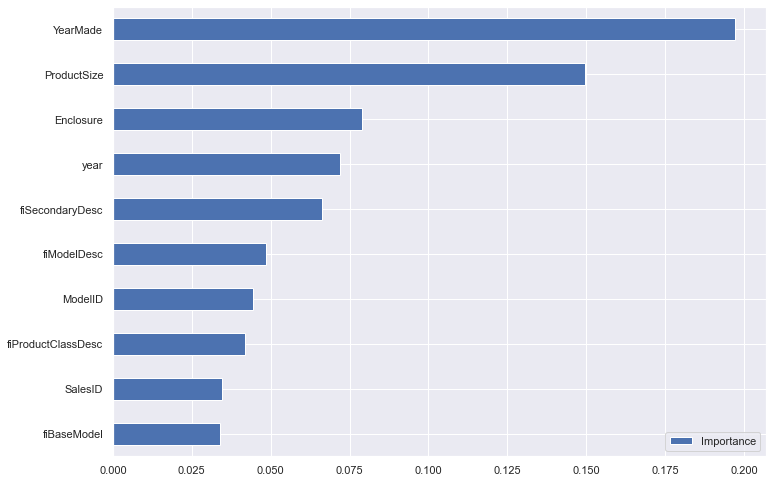

In [138]:
fi.head(10).plot.barh().invert_yaxis()

In [112]:
def plot_features(cols, importance, n=20):
    df = (pd.DataFrame({'features': cols,
                      'feature_importances': importance})
                     .sort_values('feature_importances', ascending=False)
         ).reset_index(drop=True)
    
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

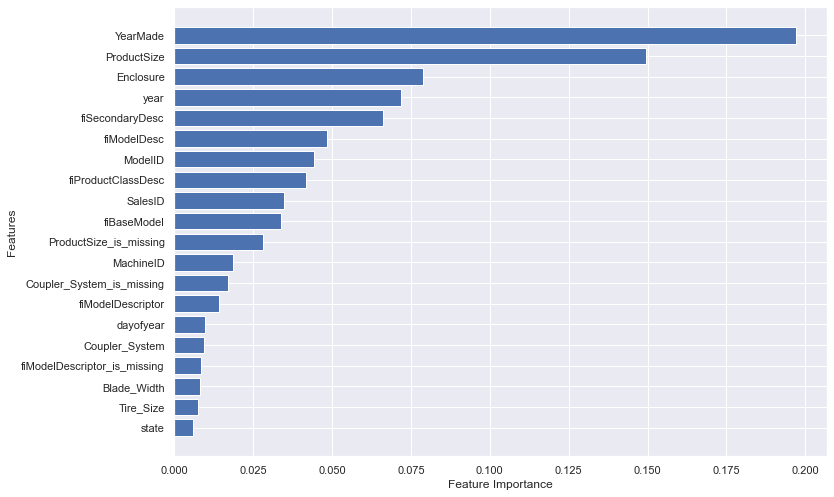

In [113]:
plot_features(X_train.columns, ideal_model.feature_importances_)